In [ ]:
import re
import csv
from urllib.request import urlopen
from bs4 import BeautifulSoup
all_countries = []

with open('top100.csv','r') as csvfile:

  for row in csvfile.readlines():
    
    try:
        page_source = urlopen(row)
        
    except urllib.URLError:
        print ("error")
        continue

    if "error" in row:
        print("error")
        
    else:
        soup = BeautifulSoup(page_source.read(), "lxml")
        soup1 = str(soup)
        #print(soup1)
        country = (re.findall(r'country(.*?)region', soup1))
        #print(country)
        all_countries.append(country)
        
print(all_countries)

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame(all_countries)
df.head()

,0
0,""":""Estados Unidos"","""
1,""":""GR"","""
2,""":""Russian Federation"","""
3,""":null,"""
4,""":null,"""


In [3]:
df.columns = ['country']
df.head()

,country
0,""":""Estados Unidos"","""
1,""":""GR"","""
2,""":""Russian Federation"","""
3,""":null,"""
4,""":null,"""


In [4]:
df['country'] = df['country'].map(lambda x: str(x)[3:-3])
df.head()

,country
0,Estados Unidos
1,GR
2,Russian Federation
3,ul
4,ul


In [5]:
df = df[df.country != 'ul']
df.country.unique()

array(['Estados Unidos', 'GR', 'Russian Federation', 'China', 'Austria',
       'Canada', 'Lithuania', 'RU', 'USA', 'CN', 'JP', 'LV', 'Malaysia',
       'Switzerland', 'United States', 'Russia', 'IL', '中国', 'Mexico',
       'Россия', 'NL', 'India', 'Brazil', 'Sweden', 'Hungary', 'LT',
       'Norway', 'Israel', 'France', '台灣', 'IN', 'United Kingdom', 'Japan',
       'Spain', 'Ukraine', 'Romania', 'Maroc', 'Belarus',
       'The Netherlands', 'US', 'Ireland', 'South Korea', 'Belgium'], dtype=object)

In [6]:
df.loc[df.country == 'Estados Unidos', 'country'] = 'United States'
df.loc[df.country == 'Russian Federation', 'country'] = 'Russia'
df.loc[df.country == 'RU', 'country'] = 'Russia'
df.loc[df.country == 'Россия', 'country'] = 'Russia'
df.loc[df.country == 'USA', 'country'] = 'United States'
df.loc[df.country == 'US', 'country'] = 'United States'
df.loc[df.country == 'CN', 'country'] = 'China'
df.loc[df.country == 'JP', 'country'] = 'Japan'
df.loc[df.country == '中国', 'country'] = 'China'
df.loc[df.country == 'IL', 'country'] = 'Israel'
df.loc[df.country == 'LV', 'country'] = 'Latvia'
df.loc[df.country == 'NL', 'country'] = 'The Netherlands'
df.loc[df.country == '台灣', 'country'] = 'Taiwan'
df.loc[df.country == 'LT', 'country'] = 'Lithuania'
df.loc[df.country == 'IN', 'country'] = 'India'
df.loc[df.country == 'GR', 'country'] = 'Greece'

In [7]:
df.country.unique()

array(['United States', 'Greece', 'Russia', 'China', 'Austria', 'Canada',
       'Lithuania', 'Japan', 'Latvia', 'Malaysia', 'Switzerland', 'Israel',
       'Mexico', 'The Netherlands', 'India', 'Brazil', 'Sweden', 'Hungary',
       'Norway', 'France', 'Taiwan', 'United Kingdom', 'Spain', 'Ukraine',
       'Romania', 'Maroc', 'Belarus', 'Ireland', 'South Korea', 'Belgium'], dtype=object)

In [8]:
df.groupby(['country'])
count = (df['country'].value_counts())
count.head()

United States    28
Russia           15
China             6
Japan             5
India             3
Name: country, dtype: int64

In [9]:
count1 = count.reset_index()
count1.columns = ['country', 'count']
count1.head()

,country,count
0,United States,28
1,Russia,15
2,China,6
3,Japan,5
4,India,3


Axes(0.125,0.125;0.775x0.755)


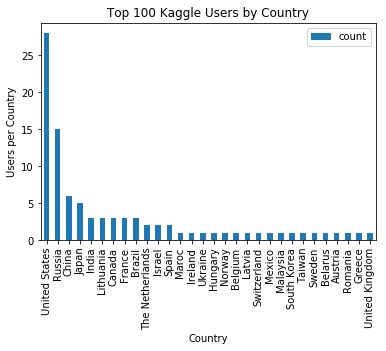

In [11]:
hj = count1.plot(kind='bar', x='country', title='Top 100 Kaggle Users by Country')
hj.set_ylabel("Users per Country")
hj.set_xlabel("Country")
print(hj)

In [12]:
def rank(c):
  if c['count'] == 1:
    return 'other'
  elif c['count'] == 2:
    return 'other'
  elif c['count'] == 3:
    return 'other'
  else:
    return 'top'

count1['rank'] = count1.apply(rank, axis=1)

In [13]:
count1.head(10)

,country,count,rank
0,United States,28,top
1,Russia,15,top
2,China,6,top
3,Japan,5,top
4,India,3,other
5,Lithuania,3,other
6,Canada,3,other
7,France,3,other
8,Brazil,3,other
9,The Netherlands,2,other


In [14]:
top1 = count1.loc[count1['rank'] == 'top']
top1.head()

,country,count,rank
0,United States,28,top
1,Russia,15,top
2,China,6,top
3,Japan,5,top


In [15]:
other1 = count1.loc[count1['rank'] == 'other']
other1.head()

,country,count,rank
4,India,3,other
5,Lithuania,3,other
6,Canada,3,other
7,France,3,other
8,Brazil,3,other


In [16]:
otherTotal = other1['count'].sum()
print(otherTotal)

39


In [17]:
df2 = pd.DataFrame({ 'country' : 'other','count' : otherTotal, 'rank' : 'other'}, index=[0])

In [18]:
df2.head()

,count,country,rank
0,39,other,other


In [19]:
go = top1.append(df2)
go.head()

,count,country,rank
0,28,United States,top
1,15,Russia,top
2,6,China,top
3,5,Japan,top
0,39,other,other


In [20]:
chay = go[['country', 'count']]
chay.head()

,country,count
0,United States,28
1,Russia,15
2,China,6
3,Japan,5
0,other,39


Axes(0.125,0.125;0.775x0.755)


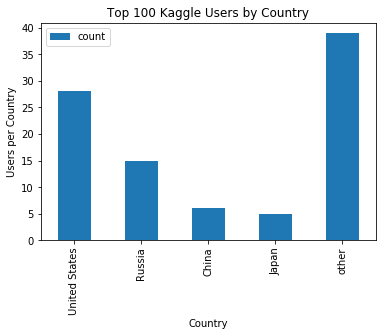

In [23]:
xa = chay.plot(x='country', y='count', kind='bar', title='Top 100 Kaggle Users by Country')
xa.set_ylabel("Users per Country")
xa.set_xlabel("Country")
print(xa)